..\csv\*.csv
Processed data for dalle-2.csv
Processed data for dalle-3.csv
Processed data for hdr.csv
Processed data for midjourney.csv
Processed data for mscoco2014.csv
Processed data for vqgan.csv


logits_Grag2021_progan           logits_Grag2021_latent  \
                                    accuracy       auc               accuracy   
..\csv\dalle-2.csv                    0.6050  0.959903                  0.507   
..\csv\dalle-3.csv                    0.5175  0.684124                  0.857   
..\csv\hdr.csv                        0.5205  0.772063                  0.858   
..\csv\midjourney.csv                 0.5315  0.835863                  0.984   
..\csv\mscoco2014.csv                 0.5175  0.684124                  0.857   
..\csv\vqgan.csv                      0.6860  0.944237                  0.792   

                                resnet50nodown_progan            \
                            auc              accuracy       auc   
..\csv\dalle-2.csv     0.658364                0.6920  0.955195   
..\csv\dalle-3.csv     0.853372                0.4990  0.649602   
..\csv\hdr.csv         0.936342                0.4930  0.579278   
..\csv\midjourney.csv  0.994271                0.6105  0.872290   
..\csv\mscoco2014.csv  0.853372                0.4990  0.649602   
..\csv\vqgan.csv       0.956349                0.7185  0.935043   

                      resnet50nodown_stylegan2           exif_model      \
                                      accuracy       auc   accuracy auc   
..\csv\dalle-2.csv                      0.5035  0.794980        0.5 NaN   
..\csv\dalle-3.csv                      0.5025  0.647201        0.5 NaN   
..\csv\hdr.csv                          0.5035  0.736739        0.5 NaN   
..\csv\midjourney.csv                   0.5050  0.769751        0.5 NaN   
..\csv\mscoco2014.csv                   0.5025  0.647201        0.5 NaN   
..\csv\vqgan.csv                        0.7065  0.940283        0.5 NaN   

                      aggregate          
                       accuracy     auc  
..\csv\dalle-2.csv       0.7330  0.7330  
..\csv\dalle-3.csv       0.8460  0.8460  
..\csv\hdr.csv           0.8440  0.8440  
..\csv\midjourney.csv    0.9755  0.9755  
..\csv\mscoco2014.csv    0.8460  0.8460  
..\csv\vqgan.csv         0.8875  0.8875

,logits_Grag2021_progan,logits_Grag2021_latent,resnet50nodown_progan,resnet50nodown_stylegan2,exif_model,aggregate,Dataset
,accuracy,accuracy,accuracy,accuracy,accuracy,accuracy,
0,0.6050,0.507,0.6920,0.5035,0.5,0.7330,..\csv\dalle-2.csv
1,0.5175,0.857,0.4990,0.5025,0.5,0.8460,..\csv\dalle-3.csv
2,0.5205,0.858,0.4930,0.5035,0.5,0.8440,..\csv\hdr.csv
3,0.5315,0.984,0.6105,0.5050,0.5,0.9755,..\csv\midjourney.csv
4,0.5175,0.857,0.4990,0.5025,0.5,0.8460,..\csv\mscoco2014.csv
5,0.6860,0.792,0.7185,0.7065,0.5,0.8875,..\csv\vqgan.csv


,logits_Grag2021_progan,logits_Grag2021_latent,resnet50nodown_progan,resnet50nodown_stylegan2,exif_model,aggregate,Dataset
,auc,auc,auc,auc,auc,auc,
0,0.959903,0.658364,0.955195,0.794980,NaN,0.7330,..\csv\dalle-2.csv
1,0.684124,0.853372,0.649602,0.647201,NaN,0.8460,..\csv\dalle-3.csv
2,0.772063,0.936342,0.579278,0.736739,NaN,0.8440,..\csv\hdr.csv
3,0.835863,0.994271,0.872290,0.769751,NaN,0.9755,..\csv\midjourney.csv
4,0.684124,0.853372,0.649602,0.647201,NaN,0.8460,..\csv\mscoco2014.csv
5,0.944237,0.956349,0.935043,0.940283,NaN,0.8875,..\csv\vqgan.csv


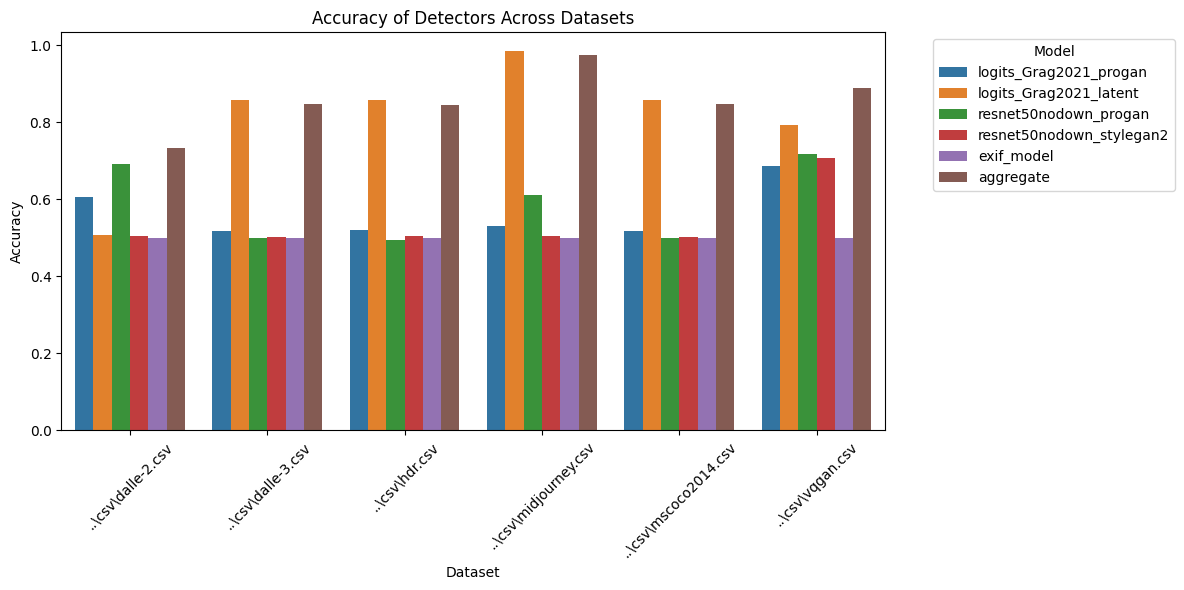

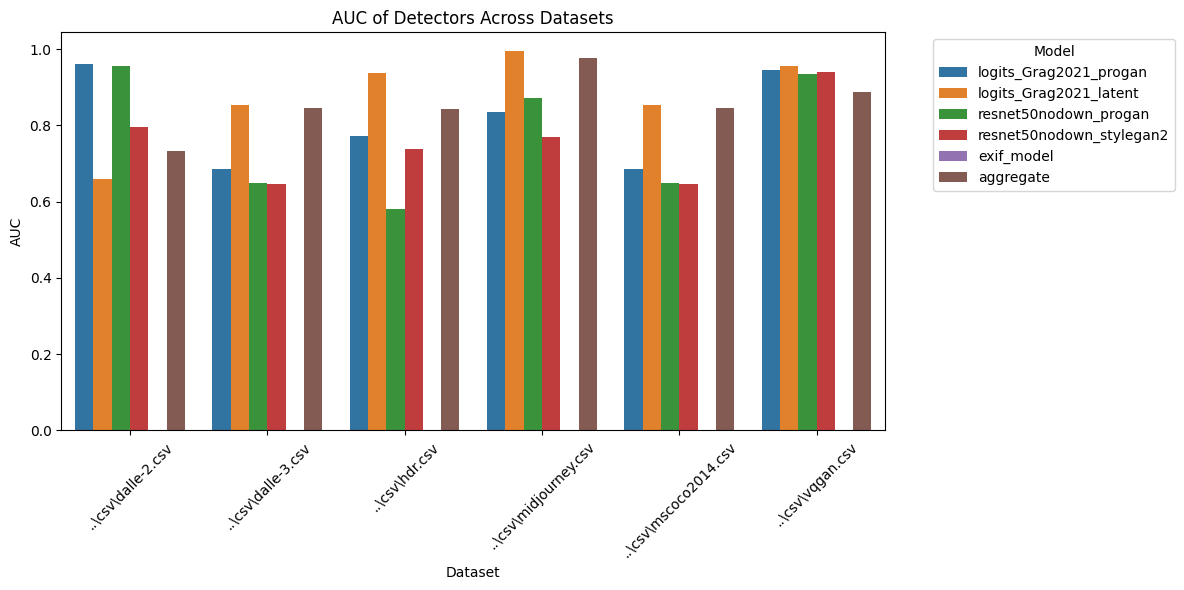

In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
from pathlib import Path

# Define the CSV folder path and CSV files
folder_path = "..\csv\\"
mscoco2014_csv = os.path.join(folder_path, 'mscoco2014.csv')
dalle3_csv = os.path.join(folder_path, 'dalle-3.csv')

# Define the threshold for considering an image as synthetic
probability_threshold = 0.2

# CSV mapping
model_columns = {
    'logits_Grag2021_progan': 'dMDetectorResultsinferenceResults_logits_Grag2021_progan',
    'logits_Grag2021_latent': 'dMDetectorResultsinferenceResults_logits_Grag2021_latent',
    'resnet50nodown_progan': 'gANDetectorResultsinferenceResults_logits_gandetection_resnet50nodown_progan',
    'resnet50nodown_stylegan2': 'gANDetectorResultsinferenceResults_logits_gandetection_resnet50nodown_stylegan2',
    'exif_model': 'exifDetectorResultsinferenceResults_isSyntheticImage'
}

# Load MSCOCO2014 and DALLE-3 dataset results
df_mscoco2014 = pd.read_csv(mscoco2014_csv)
df_dalle3 = pd.read_csv(dalle3_csv)

def logits_to_probabilities(logits):
    return 1 / (1 + np.exp(-logits))

def calculate_model_performance(df, threshold):
    performances = {}
    for model_name, column in model_columns.items():
        if 'exif' not in model_name:
            # Convert logits to probabilities for non-exif models
            prob_column = f'{model_name}_prob'
            df[prob_column] = logits_to_probabilities(df[column])
            # Make predictions based on the threshold
            pred_column = f'{model_name}_pred'
            df[pred_column] = df[prob_column] > threshold
            # Calculate accuracy and AUC
            auc_score = roc_auc_score(df['true_label'], df[prob_column])
        else:
            # Use the output directly for exif model
            pred_column = column
            # AUC is not applicable for exif model
            auc_score = np.nan

        performances[model_name] = {
            'accuracy': accuracy_score(df['true_label'], df[pred_column]),
            'auc': auc_score
        }

    # Aggregate results
    prediction_columns = [f'{model}_pred' for model in model_columns.keys() if 'exif' not in model]
    df['final_pred'] = df[prediction_columns].any(axis=1)
    performances['aggregate'] = {
        'accuracy': accuracy_score(df['true_label'], df['final_pred']),
        'auc': roc_auc_score(df['true_label'], df[prediction_columns].max(axis=1))
    }

    return performances

# Construct the pattern to match all CSV files in the folder
pattern = os.path.join(folder_path, '*.csv')
print(pattern)

# Use glob to find all files matching the pattern
csv_files = glob.glob(pattern)

# List of CSV files for each dataset
performance_across_datasets = {model: {'accuracy': [], 'auc': []} for model in ['logits_Grag2021_progan', 'logits_Grag2021_latent', 'resnet50nodown_progan', 'resnet50nodown_stylegan2', 'exif_model', 'aggregate']}

# Loop through each CSV file
for csv_file_path in csv_files:
    csv_file_name = os.path.basename(csv_file_path)
    df = pd.read_csv(csv_file_path)

    # Check dataset name for merging
    if csv_file_name in ['mscoco2014.csv', 'hdr.csv']:
        merged_df = pd.concat([df, df_dalle3], ignore_index=True)
    else:
        merged_df = pd.concat([df, df_mscoco2014], ignore_index=True)

    # Applying sigmoid function to convert logits to probabilities
    for model_name, column in model_columns.items():
        if 'exif' not in model_name:
            merged_df[f'{model_name}_prob'] = logits_to_probabilities(merged_df[column])

    # Calculate model performance
    model_performances = calculate_model_performance(merged_df, probability_threshold)

    # Store accuracies and AUC for each model across datasets
    for model, perf in model_performances.items():
        performance_across_datasets[model]['accuracy'].append(perf['accuracy'])
        performance_across_datasets[model]['auc'].append(perf['auc'])

    print(f"Processed data for {csv_file_name}")

# Convert performance data to DataFrame for plotting
performance_df = pd.DataFrame({
    (model, metric): values
    for model, metrics in performance_across_datasets.items()
    for metric, values in metrics.items()
}, index=csv_files)
display(performance_df)

# Renaming the first column to 'Dataset'
performance_df.reset_index(inplace=True)
performance_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Splitting your DataFrame into separate DataFrames for Accuracy and AUC
accuracy_df = performance_df.filter(like='accuracy', axis=1).copy()
auc_df = performance_df.filter(like='auc', axis=1).copy()

# Adding the 'Dataset' column to both DataFrames
accuracy_df.loc[:, 'Dataset'] = performance_df['Dataset']
auc_df.loc[:, 'Dataset'] = performance_df['Dataset']
display(accuracy_df)
display(auc_df)

# Melting the DataFrames to long format
accuracy_melted = accuracy_df.melt(id_vars='Dataset', var_name='Model', value_name='Accuracy')
auc_melted = auc_df.melt(id_vars='Dataset', var_name='Model', value_name='AUC')

# Removing the '_accuracy' and '_auc' from the 'Model' column
accuracy_melted['Model'] = accuracy_melted['Model'].str.replace('_accuracy', '')
auc_melted['Model'] = auc_melted['Model'].str.replace('_auc', '')

# Plotting Accuracy Across Datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Dataset', y='Accuracy', hue='Model', data=accuracy_melted)
plt.title('Accuracy of Detectors Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting AUC Across Datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Dataset', y='AUC', hue='Model', data=auc_melted)
plt.title('AUC of Detectors Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('AUC')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Filtering for only the 'aggregate' model
aggregate_accuracy = accuracy_melted[accuracy_melted['Model'] == 'aggregate']

# Plotting Accuracy of the Aggregate Model Across Datasets
plt.figure(figsize=(12, 6))
sns.barplot(x='Dataset', y='Accuracy', data=aggregate_accuracy)
plt.title('Accuracy of Aggregate Model Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
